# Feasibility of a 6" f/8 Vacuum-Deformed Membrane Telescope Primary Mirror
By: Stefen Gill

In `hermida-verification.ipynb`, it is shown that the predicted profile of a pressure-deformed membrane mirror is not parabolic. The goal for this series of computations is to determine if such a mirror is "parabolic enough" to produce no noticeable aberration and be suitable for an amateur-grade telescope. This involves the following modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

### Tolerable Deviation from a Perfect Paraboloid
The image formed by a mirror is made up of Airy disks of finite radius. Airy disks are the central region of the diffraction pattern caused by plane waves passing into the circular aperture of the telescope. By the Rayleigh criterion, Airy disks forming an image are resolvable up to the point at which they half overlap each other, or, expressed mathematically, the angle between Airy disks, $\theta$, satisfies the following relationship (Cutnell & Johnson, 2001, p. 847):

$$\sin \theta = 1.22 \frac{\lambda}{D}$$

Where $\lambda$ is the wavelength of light and $D$ is the aperture diameter. $\sin \theta \approx \tan \theta$ for small $\theta$. Thus $\sin \theta \approx \rho \div f$, where $\rho$ is the radius of the Airy disk and $f$ is the mirror's focal length. $\rho$ is *also* the maximum overlap of two Airy disks that are still distinguishable. Substituting in this approximation and rearranging yields the following result:

$$\rho = 1.22 \frac{\lambda f}{D}$$

Which is calculated below with $\lambda = 2.2 \times 10^{-5}"$ (yellow-green light) by convention:

In [2]:
lam = 0.000022 # (in)
D = 6 # (in)
f = D*8 # (in)

rho = 1.22*((lam*f) / D)

In a Foucault knife-edge test in which the light source moves with the blade, the osculating spheres to a perfect paraboloid  will be displaced along the optical axis a distance $w$ from some arbitrary reference point (Baldwin; Upton, 2017):

$$w = \frac{r^{2}}{2R}$$

Where $r$ is the radius of one of the mirror's zones from the optical axis and $R$ is the radius of curvature of the mirror's center zone, which is twice its focal length. The tolerance of the mirror's shape in which the Rayleigh criterion is satisfied is given by the following formula (Baldwin; Upton, 2017):

$$x = \frac{\rho R}{r}$$

The ideal, upper, and lower bound displacements for the mirror are calculated below:

In [3]:
r = np.linspace(0, 3, 100) # (in)
R = 2*f # (in)

w_ideal = (r**2) / (2*R)
tol = (rho*R) / r
w_upper = w_ideal + tol
w_lower = w_ideal - tol

c:\users\stefe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


### Predicted Shape
The maximum deflection, $w_{0}$, of the membrane mirror is its sagitta collinear to the optical axis. This is found using simple trigonometry to be 0.046886". Using the membrane deflection theory discussed in `hermida-verification.ipynb` the mirror's predicted shape is computed in the following cell (Hermida, 1999, p. 2):

In [4]:
w_0 = 0.046886 # (in)
a = D/2 # (in)

def transverse_deflection(r):
    return w_0*(1 - (r/a)**2)**2

w_mem = transverse_deflection(r)

# w_mem is manipulated to have the same reference point as the other displacement vectors:
w_mem -= w_mem[0]

### Checking for Satisfied Tolerances:
Now the mirror's predicted shape is plotted with the upper and lower acceptable boundaries to determine if it satisfies the tolerances:

<IPython.core.display.Javascript object>


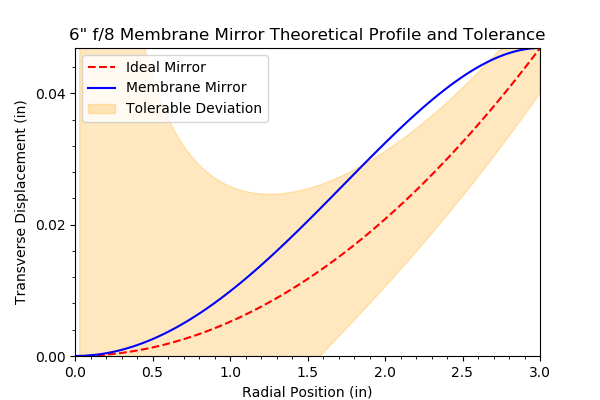

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=[6, 4])

# Plot labels:
ax.set_title('6" f/8 Membrane Mirror Theoretical Profile and Tolerance')
ax.set_xlabel('Radial Position (in)')
ax.set_ylabel('Transverse Displacement (in)')
ax.xaxis.set_major_locator(tick.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(tick.MultipleLocator(0.1))
ax.yaxis.set_major_locator(tick.MultipleLocator(0.02))
ax.yaxis.set_minor_locator(tick.MultipleLocator(0.004))

ax.set_xlim([0, 3])
ax.set_ylim([0, w_0])

# Tolerance:
ax.fill_between(r, w_upper, w_lower, color='orange', alpha=0.25, label='Tolerable Deviation')

# Ideal paraboloid:
ax.plot(r, w_ideal, linestyle='--', color='red', label='Ideal Mirror')

# Membrane mirror:
ax.plot(r, -w_mem, linestyle='-', color='blue', label='Membrane Mirror')

# Legend:
ax.legend()

### Conclusion
A 6" f/8 membrane mirror, assuming the reflective material is smooth enough to be used for optics, would almost be acceptable for an amateur astronomer. The plot above suggests that the aberration from such a mirror would come from the radial zone approximately 2 to 2.5 inches from the optical axis, where its deflection falls outside the tolerance. Theoretically, one could avoid this aberration at the cost of significantly lower light-collection if only the portion of the mirror satisfying tolerances were aluminized. Alternatively, the aperture could be designed to limit reflection to the acceptable portion of the mirror, or a larger membrane could be used to produce a continuous, reflective 6" diameter region of acceptable quality. Without these modifications, this mirror is not suitable for amateur astronomy. It may be better suited for an inexpensive schlieren imaging setup.

### Sources

Baldwin, J. (n.d.). Figuring a Telescope Mirror. Retrieved from http://www.jeffbaldwin.org/figure.htm.


Cutnell, J. D., & Johnson, K. W. (2001). Physics (5th ed.). New York: John Wiley & Sons.


Hermida, A. (1999). Deflection of stretched circular membrane under pressure. NASA Tech Briefs, 23(9), 50. Retrieved from http://ezproxy.lib.utah.edu/docview/223377471?accountid=14677


Upton, J. D. (2017, May 1). Understanding Foucault. Retrieved from https://atm-workshop.com/foucault.html.